In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
data= pd.read_csv("AirPassengers.csv")

In [5]:
data.head(9)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136


In [6]:
print (data.dtypes)

Month          object
#Passengers     int64
dtype: object


# Import Dataset and parse dates:

In [7]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
data.head(9)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [8]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [9]:
ts= data['#Passengers']

In [10]:
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [12]:
from datetime import datetime
ts['1949-01-01']
ts[datetime(1949,1,1)] #print particular data for date.
ts['1949-01-01': '1949-05-01'] # print range of data
ts[:'1949-06-01'] #print form start to that date.
ts['1949'] #all data for that year.

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

# Check stationarity of Time series: 

For the series to be said as stationary, it must have:
1. Constant Mean.
2. Constant Variance.
3. An Autocovariance that doesn't depend on time. 

Plot it to check.

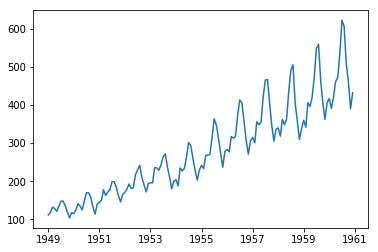

In [13]:
plt.plot(ts)

It is clearly evident that the TS has Overall Increasing trend!(Visually checking)

This plot is Xt vs t

 If we want we can more formally check stationarity using:

1.PLOT ROLLING STATISTICS: 
    Plot moving average vs t
    
2.DICKEY-FULLER TEST: 
    Ho:{ts is Non-stationary}
    H1:{ts is stationary}
    

# Make data stationary:
what nakes our data non-stationary?

1.Trend: Varying mean over time. 

2.Seasonality: Variations at specific time-frames.


# 1.Estimate & Eliminating Trend:

This can be done in many ways. (Trail n error)
use methods like take log, square root, cube root, sines or cosines etc

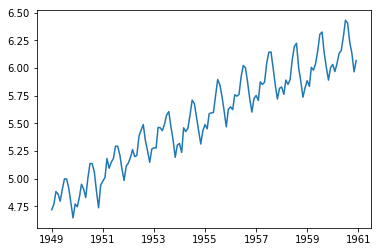

In [15]:
# use numpy to take logs of our data points:
ts_log= np.log(ts)
plt.plot(ts_log)

# Smoothing:

here we will use rolling averge: 
k consecutive values depending on the the frequency of time series:

# Method 1: Moving Average:

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  


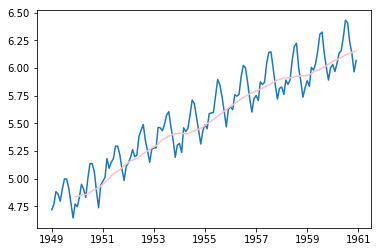

In [42]:
#pandas has inbuilt mving avg function:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color="pink")

In [43]:
# Subtract this from log:
ts_moving_avg_diff = ts_log - moving_avg
ts_moving_avg_diff.head()

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: #Passengers, dtype: float64

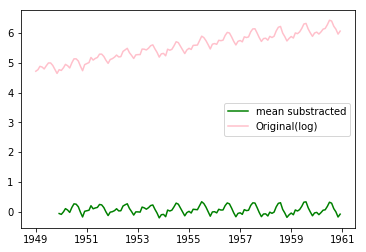

In [44]:
ts_moving_avg_diff.dropna(inplace=True)
plt.plot(ts_moving_avg_diff, color="green", label="mean substracted")
plt.plot(ts_log, color="pink", label="Original(log)")
plt.legend(loc="best")

# Method 2: Weighted Moving average:

Recent the values : Higher the weights.

Exponentially weighted moving average.


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


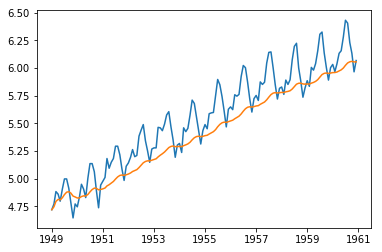

In [46]:
expwt_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwt_avg)

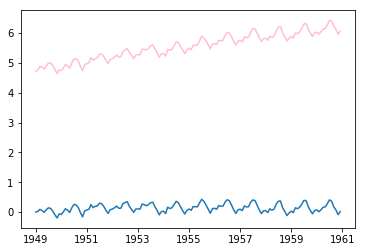

In [50]:
ts_log_ewma_diff = ts_log - expwt_avg
plt.plot(ts_log_ewma_diff)
plt.plot(ts_log, color="pink")

###### 